In [98]:
import numpy as np
import modred as mr
import os
import matplotlib
matplotlib.use('TkAgg')  # Specify the backend
import matplotlib.pyplot as plt
from matplotlib import cm

import POD
import importlib
importlib.reload(POD)

import data_analysis
importlib.reload(data_analysis)

%matplotlib inline
matplotlib.pyplot.rc('text', usetex=True)

fontsize = 18

In [2]:
from data_analysis import Simulation
current_directory = '/home/julielimonet/Documents/Stage_M2/'

simulation = Simulation(current_directory)
time, x, z, u, w, T, umean, wmean = simulation.import_data()


# 2D Example

In [21]:
from POD import POD

u1 = u[:, 40, 25]
u2 = u[:, 43, 25]

U = np.vstack((u1, u2))

modes, eigvals, eigvecs, proj_coef, KE_mode = POD(U, 1, 2, 2)

print(np.shape(modes))i = 30

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(time[::i], u2[::i], color='navy', label= r"$u'_2$")
ax.plot(time[::i], u1[::i], color='orange', label= r"$u'_1$")

# Plot projected data points
# ax.quiver(0, 0, modes[0, 1], modes[1, 1], angles='xy', scale_units='xy', scale=1, color='green', label=r"$a_2$")
# ax.quiver(0, 0, modes[0, 0], modes[1, 0], angles='xy', scale_units='xy', scale=1, color='red', label=r"$a_1$")

ax.set_xlabel(r"$t$", fontsize=fontsize)
ax.set_ylabel(r"$u'$", fontsize=fontsize)
# ax.set_aspect('equal')
ax.legend(fontsize=fontsize-5)
ax.tick_params(axis='both', labelsize=fontsize-4)

plt.tight_layout()

(2, 2)


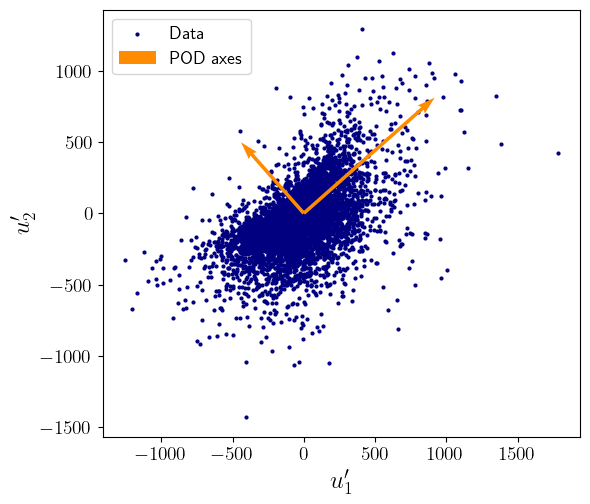

In [32]:
scaling_factor = 0.05 * np.sqrt(eigvals[:2])

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(u1, u2, color='navy', s=4, label="Data")

# Plot POD axes
i=0
ax.quiver(0, 0, modes[0, i] * scaling_factor[i], modes[1, i] * scaling_factor[i],
              angles='xy', scale_units='xy', scale=1, color='darkorange', label=r"POD axes")

i=1
ax.quiver(0, 0, modes[0, i] * scaling_factor[i], modes[1, i] * scaling_factor[i],
              angles='xy', scale_units='xy', scale=1, color='darkorange')

# Plot projected data points
# ax.quiver(0, 0, modes[0, 1], modes[1, 1], angles='xy', scale_units='xy', scale=1, color='green', label=r"$a_2$")
# ax.quiver(0, 0, modes[0, 0], modes[1, 0], angles='xy', scale_units='xy', scale=1, color='red', label=r"$a_1$")

ax.set_xlabel(r"$u'_1$", fontsize=fontsize)
ax.set_ylabel(r"$u'_2$", fontsize=fontsize)
ax.set_aspect('equal')
ax.legend(fontsize=fontsize-5)
ax.tick_params(axis='both', labelsize=fontsize-4)

plt.tight_layout()
# plt.show()
# plt.savefig('../results/POD/example', dpi=300)

# Exploration

In [7]:

umean = np.mean(u, axis=0)

h, l = np.shape(x)
m = len(time)

# reshape
u = u - umean
U = np.reshape(u, (m, h * l))


# print(np.shape(x))
# print(np.shape(x), np.shape(time))
# U = np.reshape(u, (6249, 81*51))
# print(np.shape(U))
# print(np.array_equal(np.reshape(U, (6249,81,51)), u))

# Compute POD
num_modes = 100
POD = mr.compute_POD_arrays_snaps_method(np.swapaxes(U,0,1), list(mr.range(num_modes)), atol = 0)
modes = POD.modes
eigvals = POD.eigvals

print(np.shape(modes))
print(np.shape(eigvals))
print(h*l)
KE_mode = []
for i in range(20):
    TKE = np.sum(eigvals)
    KE_mode.append(eigvals[i]/TKE)

POD_modes = []
[POD_modes.append([]) for i in range(num_modes)]
for i in range(num_modes):
  POD_modes[i] = modes[:,i]
  POD_modes[i] = POD_modes[i].reshape((h,l)) 

(4131, 100)
(3951,)
4131


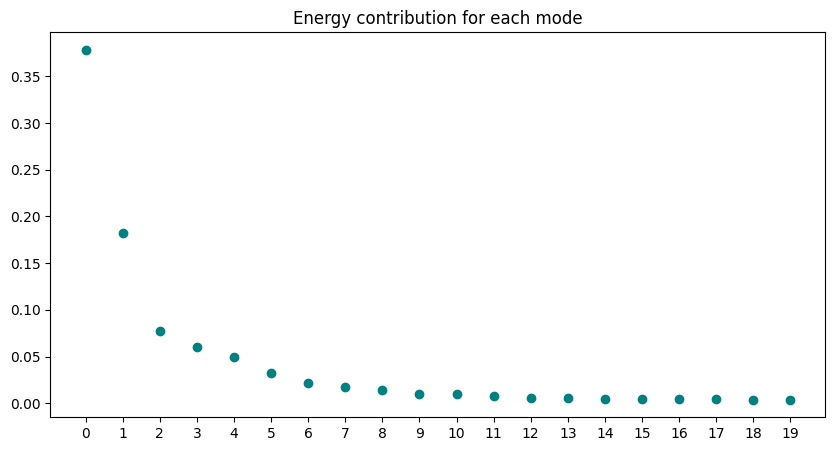

In [8]:
%matplotlib inline
N = np.arange(0, len(KE_mode), step = 1)
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(N, KE_mode, c = 'teal')
ax.set_xticks(N)
ax.set_title(f'Energy contribution for each mode')
plt.show()

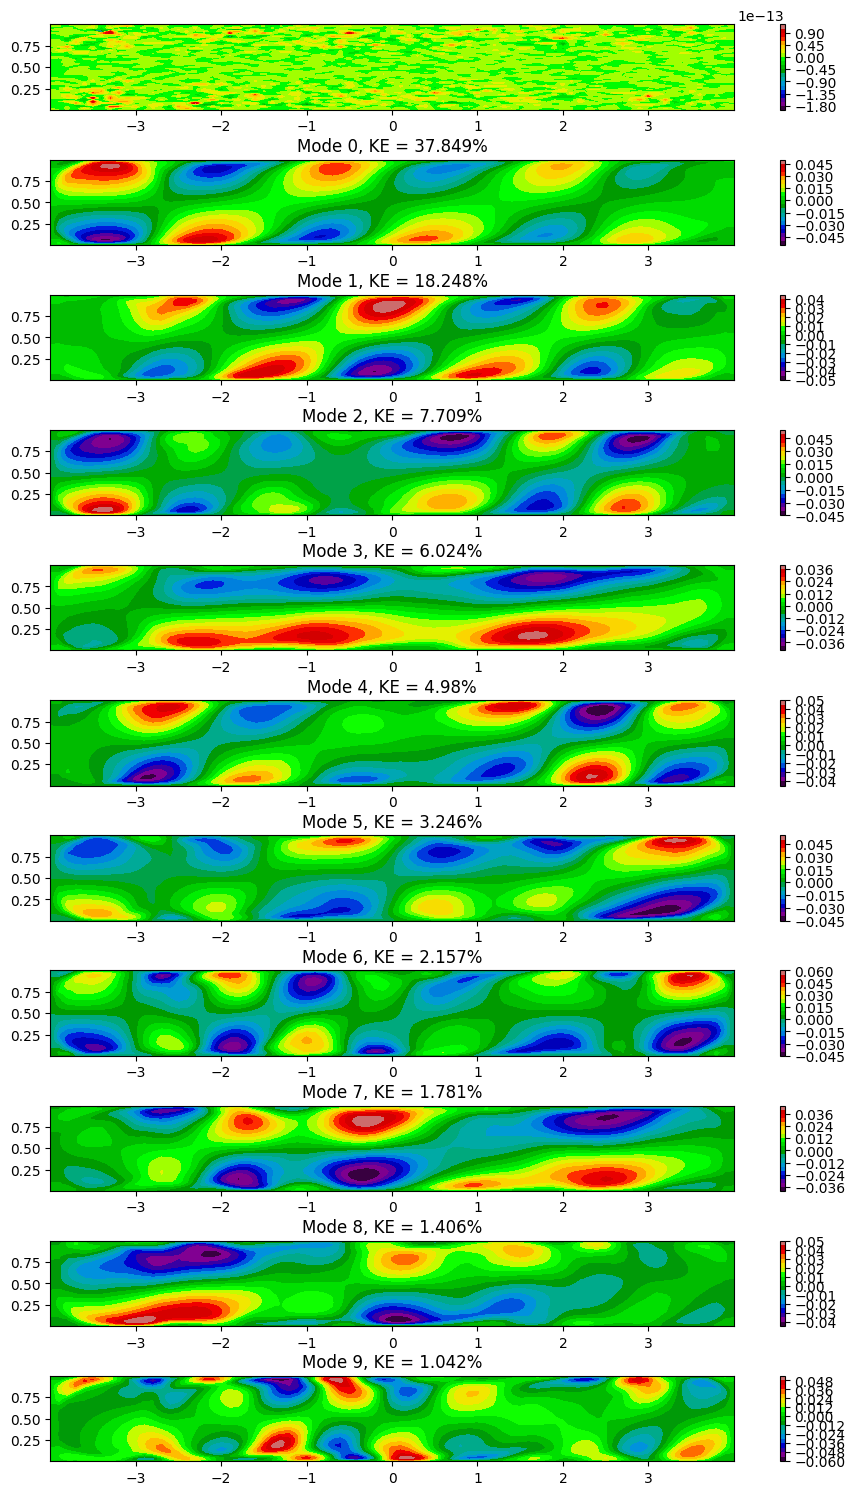

In [9]:
# --> plot results
num_modes = 10
fig, ax = plt.subplots(figsize=(10,1.5*num_modes),nrows=num_modes+1)
cf0 = ax[0].contourf(x, z, umean, levels=20, cmap=cm.nipy_spectral)
plt.colorbar(cf0)
for j in range(num_modes):
  cf0 = ax[j+1].contourf(x, z, POD_modes[j], levels=20, cmap=cm.nipy_spectral)
  plt.colorbar(cf0)
[ax[j].set_aspect('equal', 'box') for j in range(num_modes+1)]
[ax[j+1].set_title(f'Mode {j}, KE = {np.round(KE_mode[j]*100, 3)}%') for j in range(num_modes)]
plt.tight_layout()
plt.show()
# plt.savefig('pod_modes.png',dpi=300)
# plt.close()

In [10]:
from POD import POD
wmean = np.mean(w, axis=0)
w = w - wmean

h, l = np.shape(x)
m = len(time)

# reshape
W = np.reshape(w, (m, h * l))

POD_modes_w , KE_mode_w, modes_w, eigvals_w, proj_coef_w = POD(W, h, l, 100)
POD_modes_u , KE_mode_u, modes_u, eigvals_u, proj_coef_u = POD(U, h, l, 100)


In [11]:
print(np.shape(POD_modes_u))

(100, 81, 51)


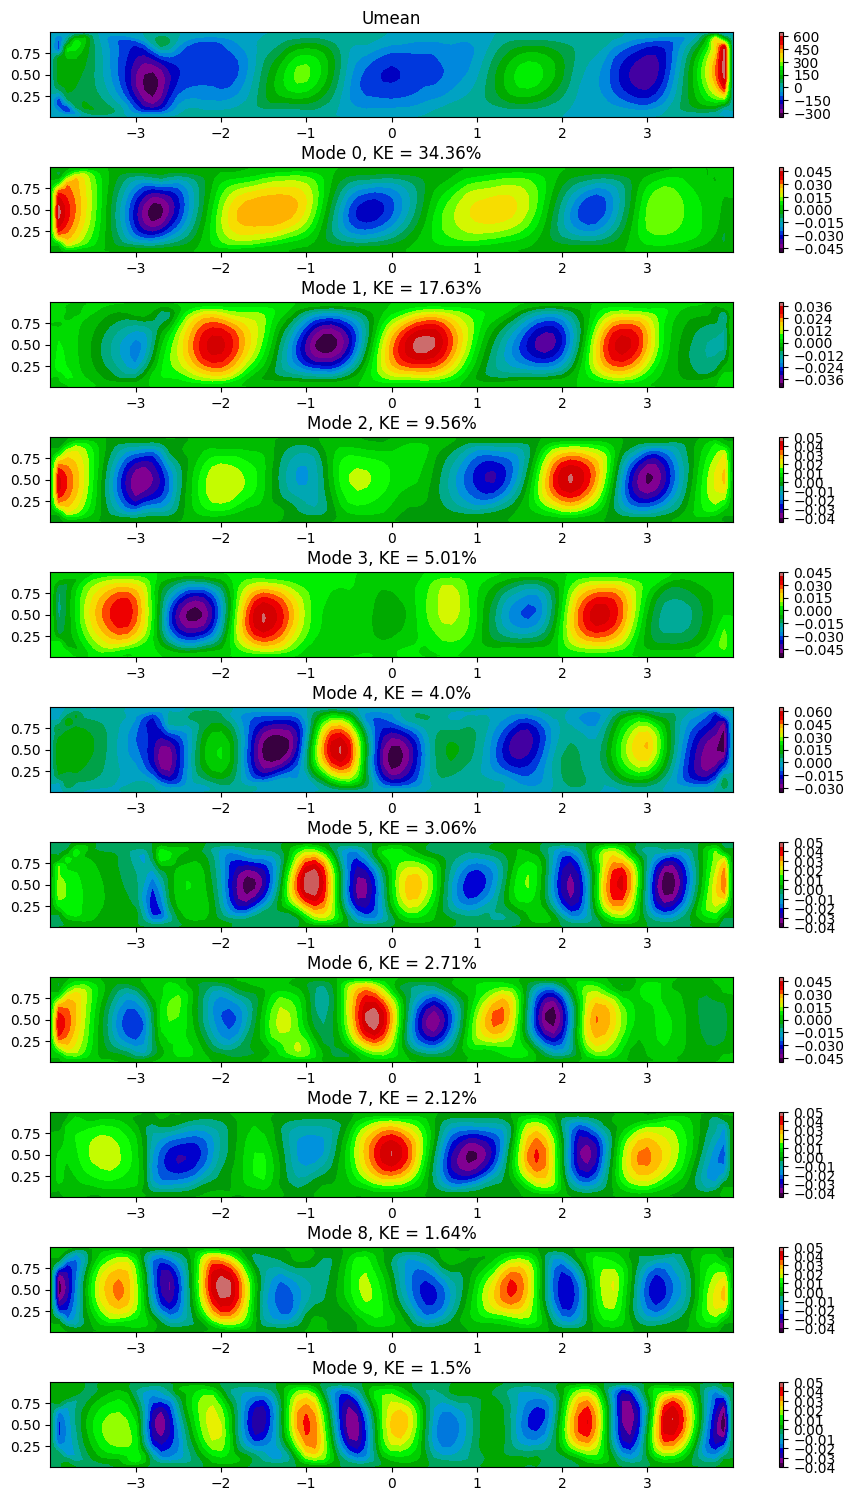

In [12]:
# --> plot results
num_modes = 10
fig, ax = plt.subplots(figsize=(10,1.5*num_modes),nrows=num_modes+1)
cf0 = ax[0].contourf(x, z, wmean, levels=20, cmap=cm.nipy_spectral)
plt.colorbar(cf0)
ax[0].set_title('Umean')

for j in range(num_modes):
  cf0 = ax[j+1].contourf(x, z, POD_modes_w[j], levels=20, cmap=cm.nipy_spectral)
  plt.colorbar(cf0)
[ax[j].set_aspect('equal', 'box') for j in range(num_modes+1)]
[ax[j+1].set_title(f'Mode {j}, KE = {np.round(KE_mode_w[j], 2)}%') for j in range(num_modes)]
plt.tight_layout()
plt.show()
# plt.savefig('pod_modes_first_w.png',dpi=300)
# plt.close()

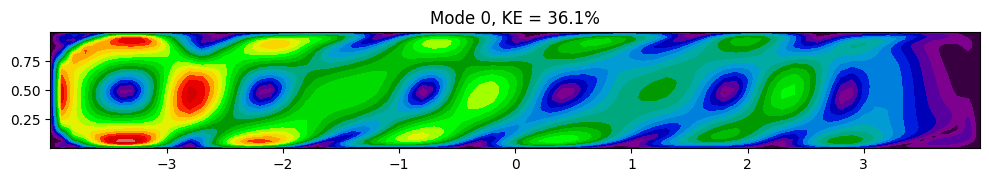

In [13]:
j = 0
fig, ax = plt.subplots(figsize=(10,15))
cf0 = ax.contourf(x, z, np.sqrt(POD_modes_u[j]**2 + POD_modes_w[j]**2), levels=20, cmap=cm.nipy_spectral)
# plt.colorbar(cf0)
ax.set_aspect('equal', 'box')
ax.set_title(f'Mode {j}, KE = {np.round((KE_mode_w[j]+KE_mode_u[j])/2, 2)}%')
plt.tight_layout()
plt.show()
# plt.savefig('pod_modes_first_w.png',dpi=300)
# plt.close()

In [18]:
print(np.shape(u))
print(81*51)

(6249, 81, 51)
4131


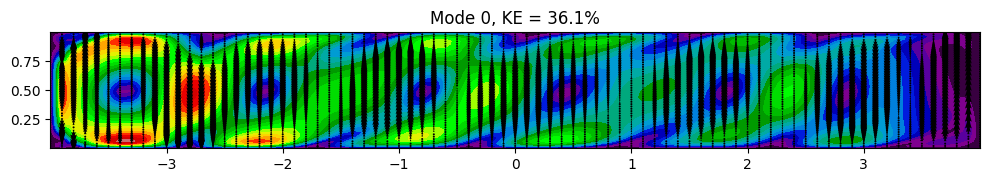

In [21]:
j = 0
fig, ax = plt.subplots(figsize=(10,15))
cf0 = ax.contourf(x, z, np.sqrt(POD_modes_u[j]**2 + POD_modes_w[j]**2), levels=20, cmap=cm.nipy_spectral)
# plt.colorbar(cf0)
ax.quiver(x, z, umean, wmean)
ax.set_aspect('equal', 'box')
ax.set_title(f'Mode {j}, KE = {np.round((KE_mode_w[j]+KE_mode_u[j])/2, 2)}%')
plt.tight_layout()
plt.show()
# plt.savefig('pod_modes_first_w.png',dpi=300)
# plt.close()

# Clean POD

### POD on velocity components

In [73]:
from data_analysis import Simulation
current_directory = '/home/julielimonet/Documents/Stage_M2/'

simulation = Simulation(current_directory)
time, x, z, u, w, T, umean, wmean = simulation.import_data()


h, l = np.shape(x)
m = len(time)

# reshape
u = u - umean
U = np.reshape(u, (m, h * l))

w = w - wmean
W = np.reshape(w, (m, h * l))

In [74]:
from POD import POD
from POD import KE_modes_two_components
from POD import KE_modes

num_modes = 100
modes_u, eigvals_u, eigvecs_u, proj_coef_u = POD(U, h, l, num_modes)
modes_w, eigvals_w, eigvecs_w, proj_coef_w = POD(W, h, l, num_modes)

KE_modes_all = KE_modes_two_components(eigvals_u, eigvals_w, num_modes)
KE_modes_u = KE_modes(eigvals_u, num_modes)
KE_modes_w = KE_modes(eigvals_w, num_modes)

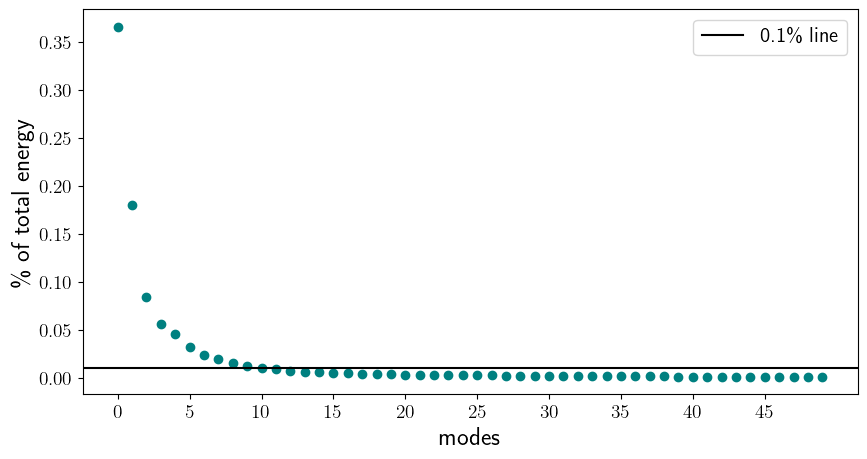

In [101]:
j = 50
from POD import plot_energy_contribution

plot_energy_contribution(KE_modes_all, j, fontsize)
plt.savefig('../results/POD/energy_contribution', dpi=300)

In [76]:
print(np.shape(modes_u))
POD_modes_u = np.reshape(modes_u, (81,51,100))
POD_modes_w = np.reshape(modes_w, (81,51,100))

(4131, 100)


In [104]:
print(np.shape(POD_modes_w))

(81, 51, 100)


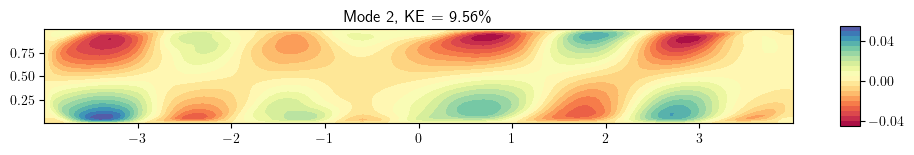

In [284]:
j = 3
ticks = [0.04, 0, -0.04]
fig, ax = plt.subplots(figsize=(10,8))
cf0 = ax.contourf(x, z, POD_modes_u[:,:,j], levels=20, cmap=cm.Spectral)
plt.colorbar(cf0, aspect = 5, shrink = 0.13, ticks = ticks)
ax.set_aspect('equal', 'box')
ax.set_title(f'Mode {j}, KE = {np.round(KE_modes_w[j]*100, 2)}\%')
plt.tight_layout()
# plt.savefig(f'../results/POD/pod_mode_w_{j}.png',dpi=200,  bbox_inches='tight')
# plt.close()

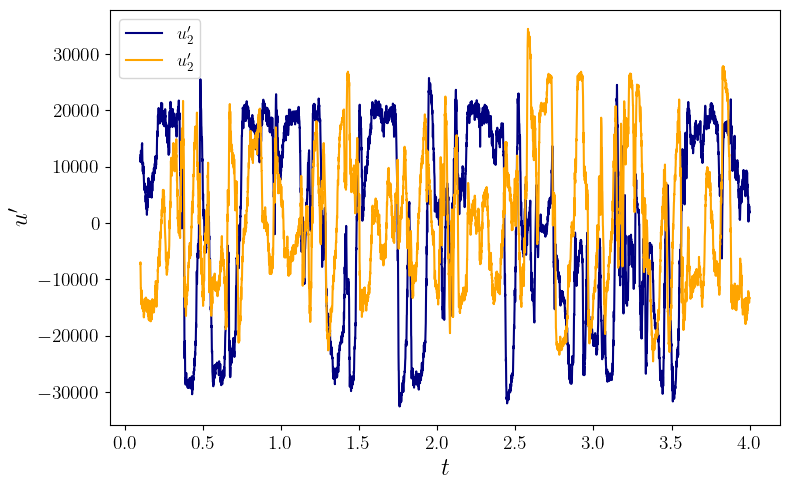

In [149]:
i = 1
num_mode = 0
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(time[::i], proj_coef_w[num_mode, ::i], color='navy', label= r"$u'_2$")
ax.plot(time[::i], proj_coef_w[1, ::i], color='orange', label= r"$u'_2$")

# Plot projected data points
# ax.quiver(0, 0, modes[0, 1], modes[1, 1], angles='xy', scale_units='xy', scale=1, color='green', label=r"$a_2$")
# ax.quiver(0, 0, modes[0, 0], modes[1, 0], angles='xy', scale_units='xy', scale=1, color='red', label=r"$a_1$")

ax.set_xlabel(r"$t$", fontsize=fontsize)
ax.set_ylabel(r"$u'$", fontsize=fontsize)
# ax.set_aspect('equal')
ax.legend(fontsize=fontsize-5)
ax.tick_params(axis='both', labelsize=fontsize-4)

plt.tight_layout()

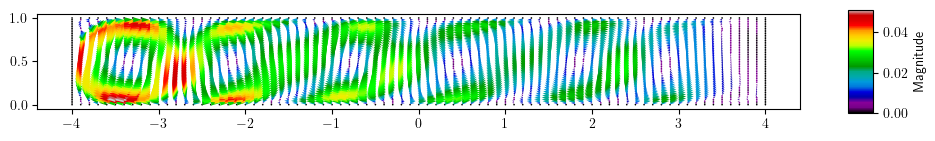

In [163]:
j = 0
fig, ax = plt.subplots(figsize=(10, 15))

# Assuming you have defined your x, z, and POD_modes_u, POD_modes_w appropriately

# Calculate magnitude of vectors for colormap
magnitude = np.sqrt(POD_modes_u[:,:,j] ** 2 + POD_modes_w[:,:,j] ** 2)

# Plot quiver with colormap
quiver_plot = ax.quiver(x, z, np.array(POD_modes_u[:,:,j]), np.array(POD_modes_w[:,:,j]), magnitude, cmap='nipy_spectral')
plt.colorbar(quiver_plot, ax=ax, label='Magnitude', aspect = 4, shrink = 0.07)

ax.set_aspect('equal', 'box')
ax.set_title(f'Mode {j}')

plt.tight_layout()
plt.show()

In [165]:
print(np.shape(x))
print(np.shape(z))
print(np.shape(POD_modes_u))
print(np.shape(POD_modes_w))

(81, 51)
(81, 51)
(81, 51, 100)
(81, 51, 100)


In [229]:
print(np.mean(np.abs(umean)), np.mean(np.abs(wmean)))

240.20303236311645 91.35275176662347


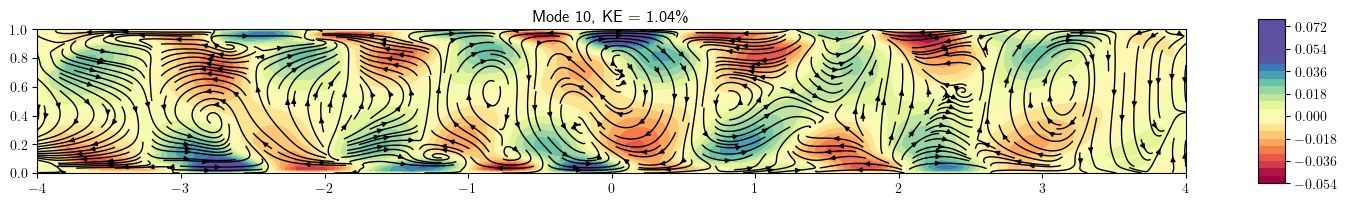

In [272]:
j= 10
fig, ax = plt.subplots(figsize = (15,5))



ax.streamplot(x.T, z.T, POD_modes_u[:,:,j].T ,POD_modes_w[:,:,j].T, color = 'k', arrowsize = 0.7,linewidth = 1, density = 3)
cf0 = ax.contourf(x, z, POD_modes_u[:,:,j], levels=20, cmap=cm.Spectral, norm=matplotlib.colors.Normalize(vmin=POD_modes_w[:,:,j].min(), vmax=POD_modes_w[:,:,j].max()))
cbar = plt.colorbar(cf0, ax=ax, shrink=0.35, aspect = 6)
cbar.ax.set_aspect('auto') 
# ax.set_title(f'Quiver plot at t = {t}')
ax.set_aspect('equal')
ax.set_ylim(0,1)
ax.set_xlim(-4,4)
ax.set_title(f'Mode {j}, KE = {np.round(KE_modes_all[j]*100, 2)}\%')

plt.tight_layout()
plt.savefig(f'../results/POD/pod_mode_{j}.png',dpi=300, bbox_inches='tight')


plt.show()

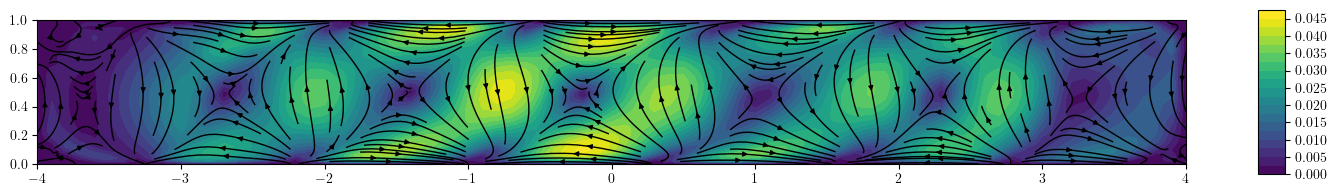

In [218]:
j= 1
fig, ax = plt.subplots(figsize = (15,5))

magnitude = np.sqrt(POD_modes_u[:,:,j] ** 2 + POD_modes_w[:,:,j] ** 2)


ax.streamplot(x.T, z.T, POD_modes_u[:,:,j].T ,POD_modes_w[:,:,j].T, color = 'k', arrowsize = 0.7,linewidth = 1, density = 2)
cf0 = ax.contourf(x, z, magnitude, levels=20, cmap=cm.viridis, norm=matplotlib.colors.Normalize(vmin=magnitude.min(), vmax=magnitude.max()))
cbar = plt.colorbar(cf0, ax=ax, shrink=0.35, aspect = 6 )
cbar.ax.set_aspect('auto') 
# ax.set_title(f'Quiver plot at t = {t}')
ax.set_aspect('equal')
ax.set_ylim(0,1)
ax.set_xlim(-4,4)
plt.tight_layout()
plt.show()

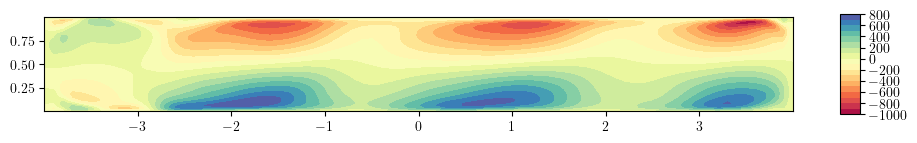

In [281]:
j = 0
ticks = [0.04, 0, -0.04]
fig, ax = plt.subplots(figsize=(10,8))
cf0 = ax.contourf(x, z,umean, levels=20, cmap=cm.Spectral)
plt.colorbar(cf0, aspect = 5, shrink = 0.13)
ax.set_aspect('equal', 'box')
plt.tight_layout()
plt.savefig(f'../results/POD/umean{j}.png',dpi=200,  bbox_inches='tight')
# plt.close()

In [273]:
print(np.shape(umean))

(81, 51)
